# **Install and import required packages**

In [1]:
# Install and import required packages
!pip install openml --quiet

import openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.8 MB/s eta 0:00:00


 # **Download the dataset from OpenML**

In [2]:

# Download the dataset from OpenML (ID: 1597)
dataset = openml.datasets.get_dataset(1597)
df, *_ = dataset.get_data()

# **Basic Statistics of the dataset**

In [3]:
#  Basic Info
print("Shape of dataset:", df.shape)
print(df.head())
print(df['Class'].value_counts())  # Fraud = 1, Legit = 0

Shape of dataset: (284807, 30)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27      

# **Missing value in the dataset**

In [4]:

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# **Feature Scaling**

In [5]:


#  Feature Scaling (only 'Amount')
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df.drop('Amount', axis=1, inplace=True)

# **Exploratry Data Analysis**

## **Class Distribution**

/tmp/ipython-input-1108749873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='pastel')


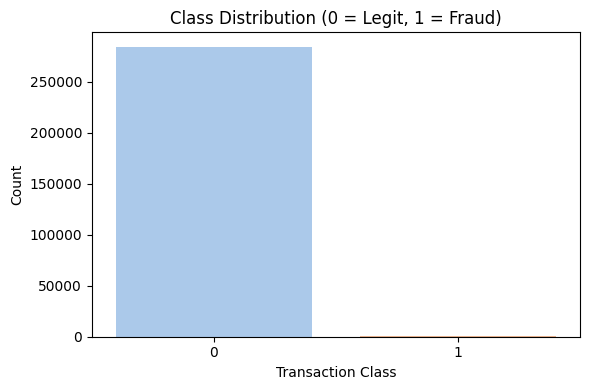

In [9]:
#  EDA - Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', palette='pastel')
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## **Scaled Amount Distribution**

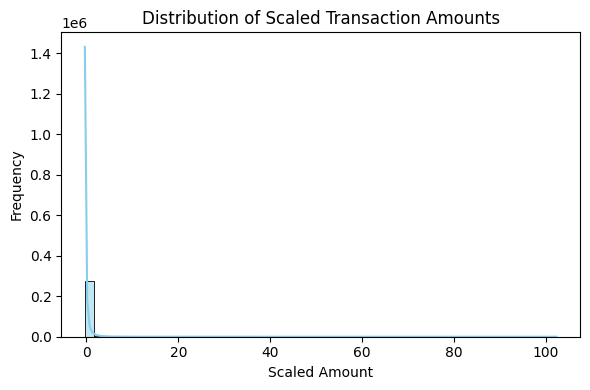

In [10]:


# 5. EDA - Scaled Amount Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['scaled_amount'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Scaled Transaction Amounts")
plt.xlabel("Scaled Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## **Correlation Heatmap**

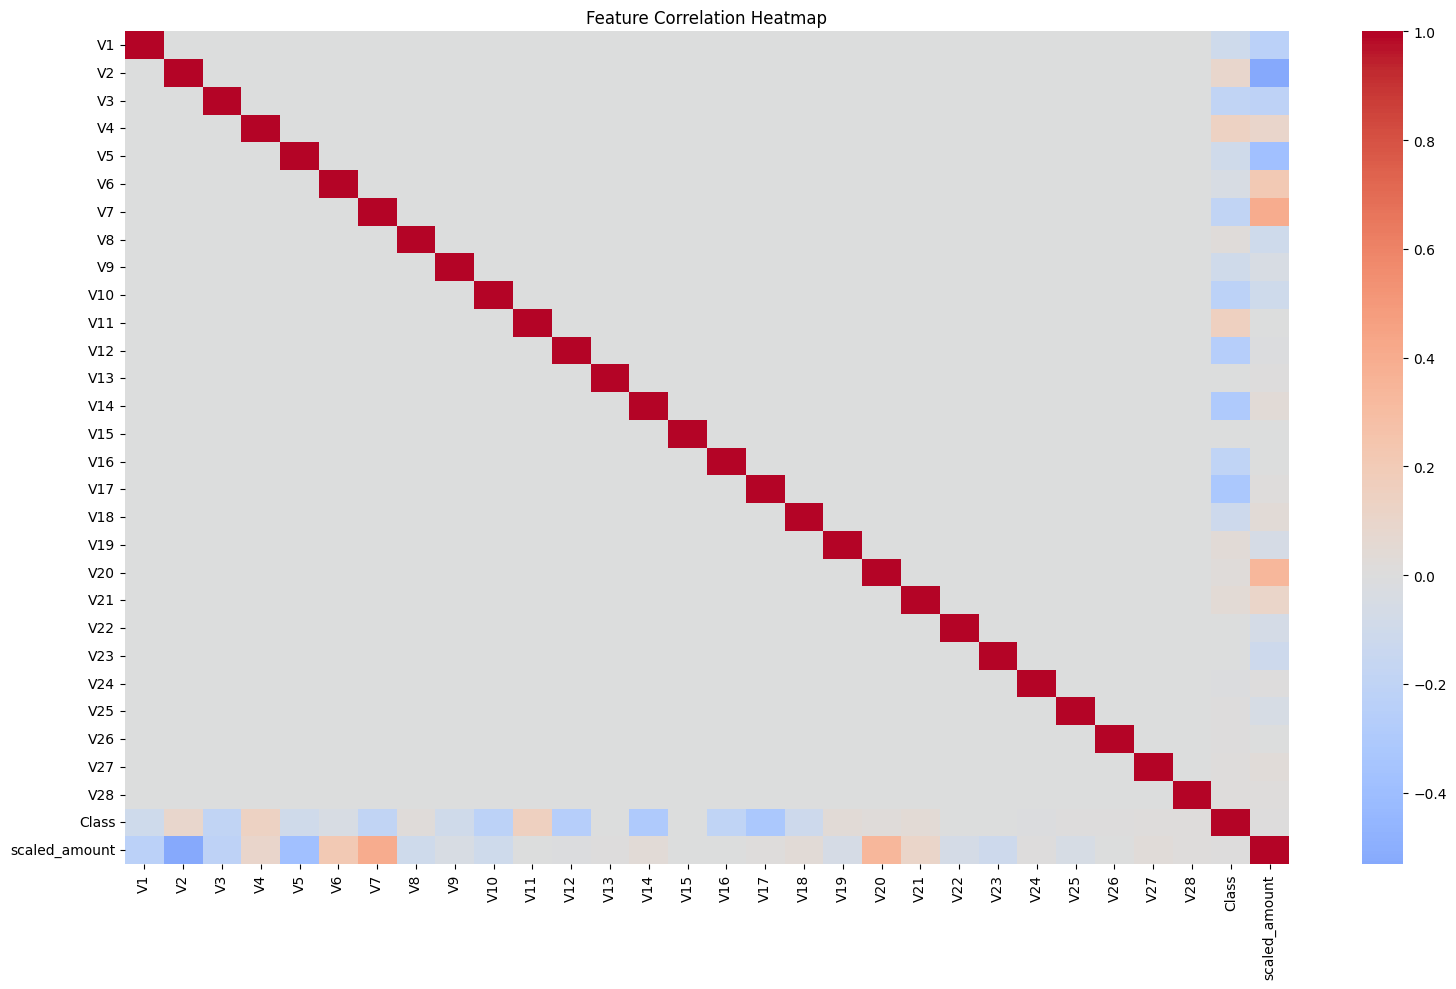

In [11]:


# Correlation Heatmap
plt.figure(figsize=(16, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## **Distribution of a few example features by class**

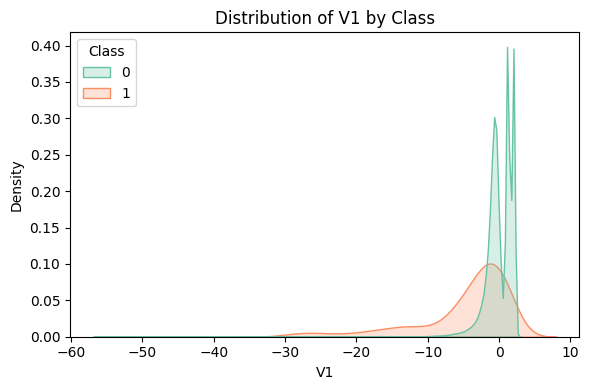

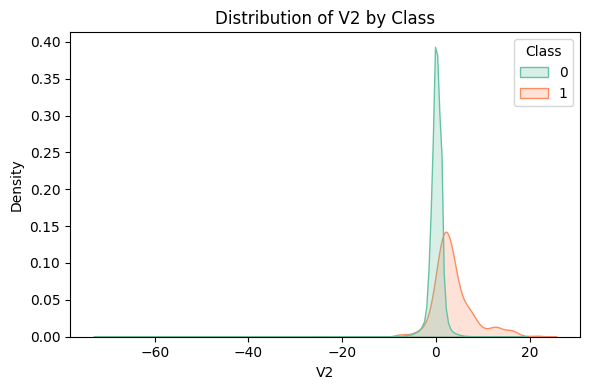

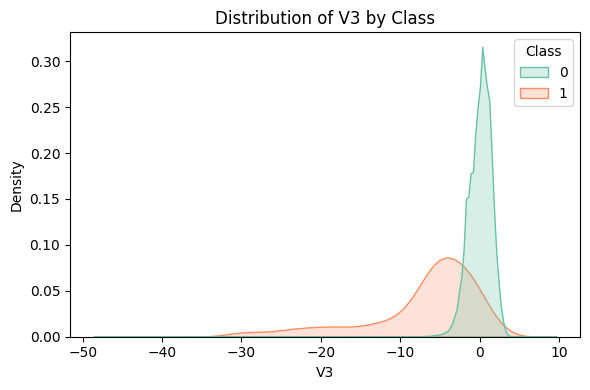

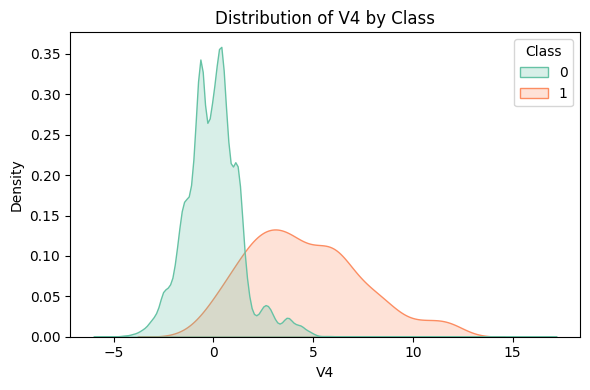

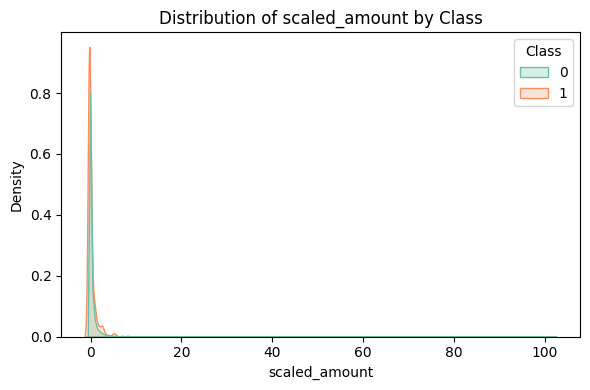

In [12]:



# 7. Distribution of a few example features by class
sample_features = ['V1', 'V2', 'V3', 'V4', 'scaled_amount']
for feature in sample_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=feature, hue='Class', fill=True, common_norm=False, palette='Set2')
    plt.title(f"Distribution of {feature} by Class")
    plt.tight_layout()
    plt.show()


#

# **Model implementation**

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report


## **Train Test Split**

In [7]:

# Prepare data for training
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


##**Model Define**

In [8]:

# Define models to train
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),

}

## **Model Evalution**


Training Logistic Regression...
--- Logistic Regression Performance ---
Accuracy: 0.9992
Precision: 0.8598
Recall: 0.6216
F1 Score: 0.7216
ROC AUC: 0.9546

Confusion Matrix:
 [[85280    15]
 [   56    92]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.62      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



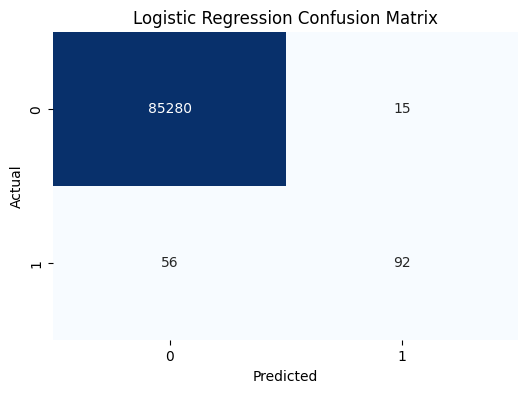

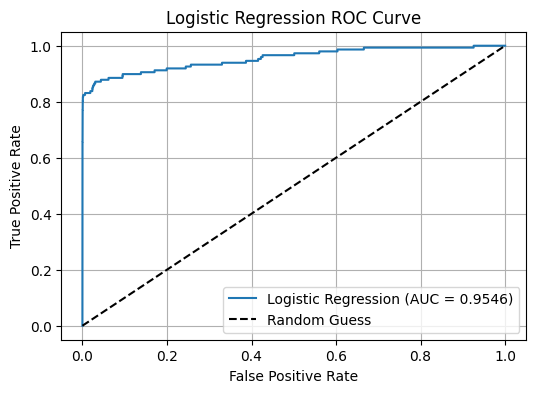


Training Decision Tree...
--- Decision Tree Performance ---
Accuracy: 0.9992
Precision: 0.8074
Recall: 0.7365
F1 Score: 0.7703
ROC AUC: 0.8681

Confusion Matrix:
 [[85269    26]
 [   39   109]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.74      0.77       148

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



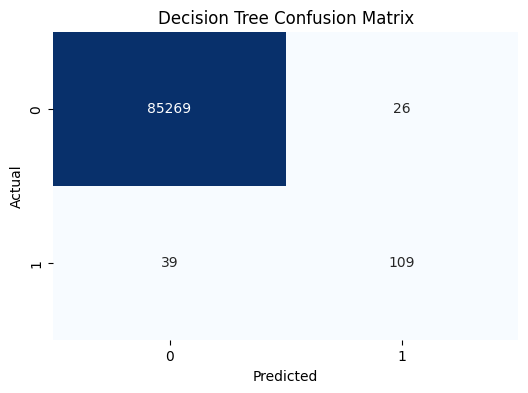

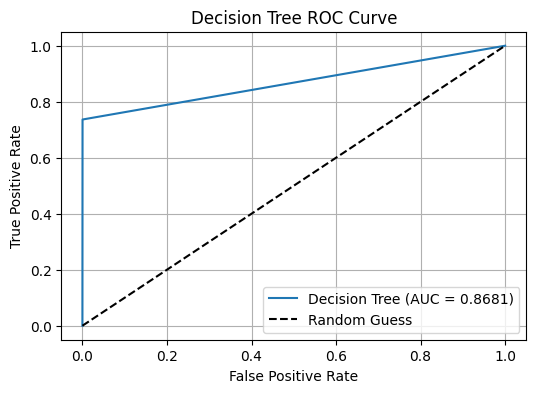


Training Random Forest...
--- Random Forest Performance ---
Accuracy: 0.9995
Precision: 0.9576
Recall: 0.7635
F1 Score: 0.8496
ROC AUC: 0.9341

Confusion Matrix:
 [[85290     5]
 [   35   113]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



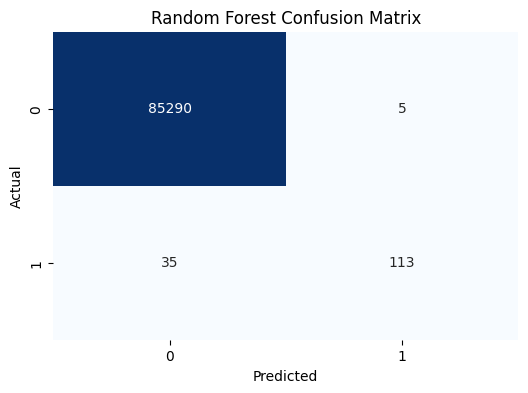

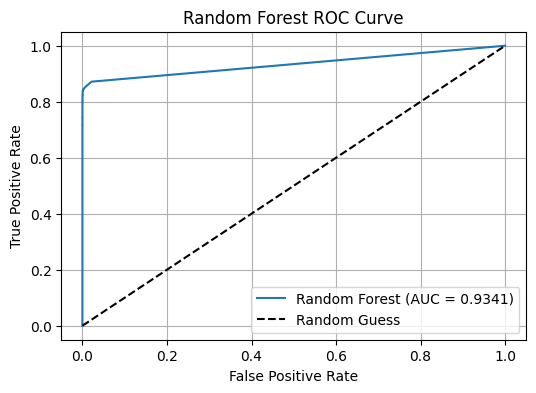


Training Gradient Boosting...
--- Gradient Boosting Performance ---
Accuracy: 0.9984
Precision: 0.7273
Recall: 0.1622
F1 Score: 0.2652
ROC AUC: 0.3446

Confusion Matrix:
 [[85286     9]
 [  124    24]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.16      0.27       148

    accuracy                           1.00     85443
   macro avg       0.86      0.58      0.63     85443
weighted avg       1.00      1.00      1.00     85443



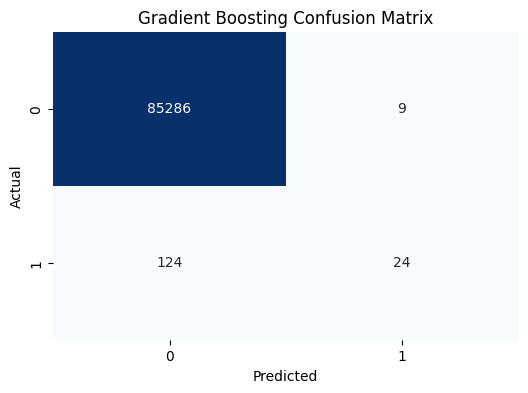

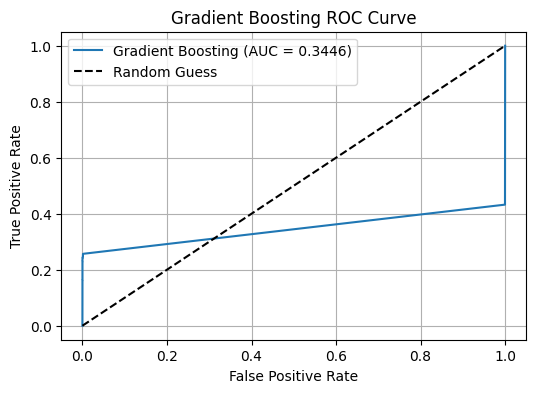


--- Summary of Model Performance ---

Logistic Regression:
  Accuracy: 0.9992
  Precision: 0.8598
  Recall: 0.6216
  F1 Score: 0.7216
  ROC AUC: 0.9546

Decision Tree:
  Accuracy: 0.9992
  Precision: 0.8074
  Recall: 0.7365
  F1 Score: 0.7703
  ROC AUC: 0.8681

Random Forest:
  Accuracy: 0.9995
  Precision: 0.9576
  Recall: 0.7635
  F1 Score: 0.8496
  ROC AUC: 0.9341

Gradient Boosting:
  Accuracy: 0.9984
  Precision: 0.7273
  Recall: 0.1622
  F1 Score: 0.2652
  ROC AUC: 0.3446


In [16]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability for ROC curve

    # Convert y_test to string type for evaluation metrics
    y_test_str = y_test.astype(str)
    y_pred_str = [str(label) for label in y_pred]

    # Evaluate performance
    accuracy = accuracy_score(y_test_str, y_pred_str)
    precision = precision_score(y_test_str, y_pred_str, pos_label='1')
    recall = recall_score(y_test_str, y_pred_str, pos_label='1')
    f1 = f1_score(y_test_str, y_pred_str, pos_label='1')
    roc_auc = roc_auc_score(y_test_str, y_pred_proba)
    conf_matrix = confusion_matrix(y_test_str, y_pred_str)
    class_report = classification_report(y_test_str, y_pred_str)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Model': model # Store the trained model
    }

    # Print evaluation metrics
    print(f"--- {name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_str, y_pred_proba, pos_label='1')
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Print a summary of results
print("\n--- Summary of Model Performance ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")

# **Kfold Accuracy**

In [9]:
from sklearn.model_selection import KFold, cross_val_score

# Apply k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5 folds

print("\n--- Cross-Validation Scores ---")
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc') # Use ROC AUC as scoring metric
    print(f"{name}: {np.mean(cv_scores):.4f} +/- {np.std(cv_scores):.4f} (ROC AUC)")


--- Cross-Validation Scores ---
Logistic Regression: 0.9748 +/- 0.0077 (ROC AUC)
Decision Tree: 0.8910 +/- 0.0199 (ROC AUC)
Random Forest: 0.9525 +/- 0.0146 (ROC AUC)
Gradient Boosting: 0.6798 +/- 0.1662 (ROC AUC)


# **SMOTE**

In [10]:
from imblearn.over_sampling import SMOTE

# Prepare data for training
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

##**Model Define**

In [11]:

# Define models to train
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),

}

## **Model Evalution**


Training Logistic Regression...
--- Logistic Regression Performance ---
Accuracy: 0.9460
Precision: 0.9733
Recall: 0.9170
F1 Score: 0.9443
ROC AUC: 0.9891

Confusion Matrix:
 [[83153  2142]
 [ 7077 78217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     85295
           1       0.97      0.92      0.94     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



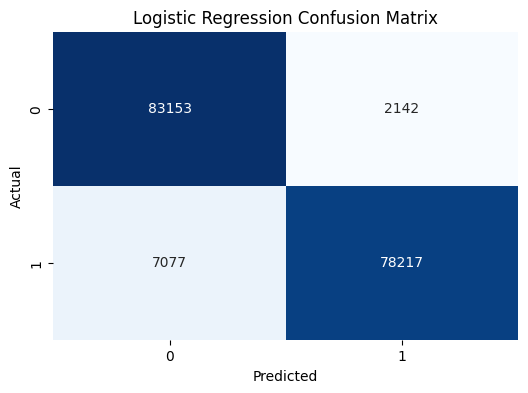

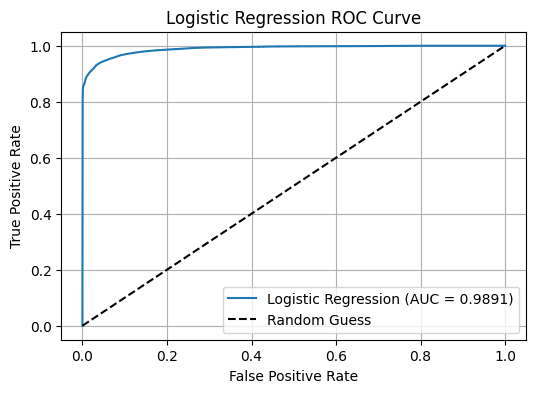


Training Decision Tree...
--- Decision Tree Performance ---
Accuracy: 0.9978
Precision: 0.9967
Recall: 0.9989
F1 Score: 0.9978
ROC AUC: 0.9978

Confusion Matrix:
 [[85009   286]
 [   92 85202]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



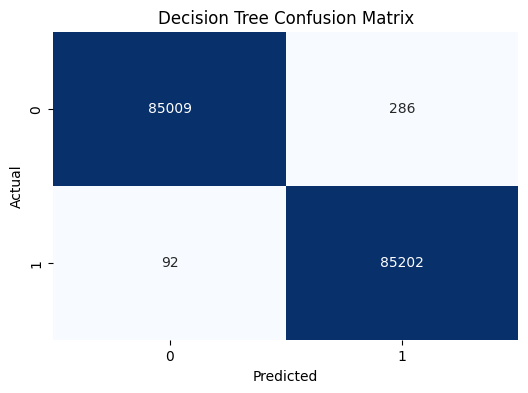

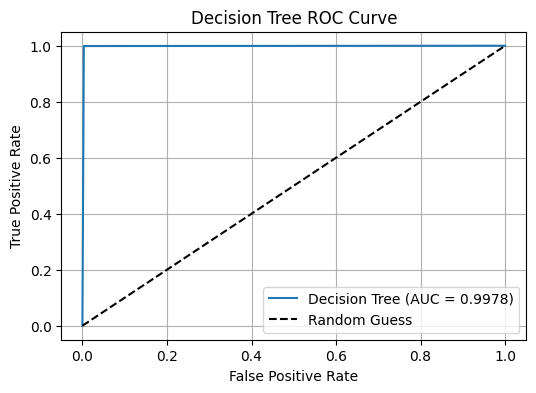


Training Random Forest...
--- Random Forest Performance ---
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1 Score: 0.9999
ROC AUC: 1.0000

Confusion Matrix:
 [[85274    21]
 [    0 85294]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



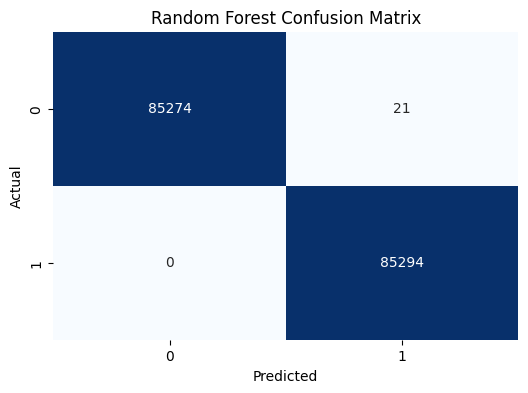

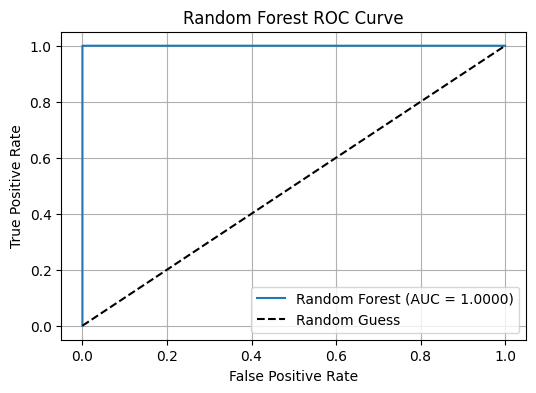


Training Gradient Boosting...
--- Gradient Boosting Performance ---
Accuracy: 0.9766
Precision: 0.9861
Recall: 0.9668
F1 Score: 0.9764
ROC AUC: 0.9982

Confusion Matrix:
 [[84136  1159]
 [ 2834 82460]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     85295
           1       0.99      0.97      0.98     85294

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



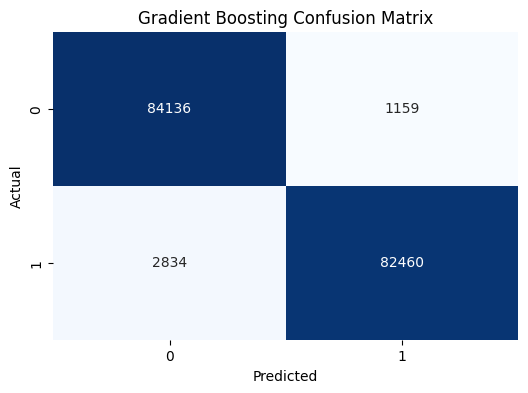

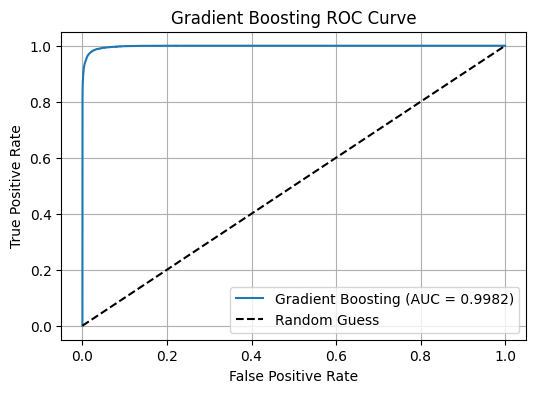


--- Summary of Model Performance ---

Logistic Regression:
  Accuracy: 0.9460
  Precision: 0.9733
  Recall: 0.9170
  F1 Score: 0.9443
  ROC AUC: 0.9891

Decision Tree:
  Accuracy: 0.9978
  Precision: 0.9967
  Recall: 0.9989
  F1 Score: 0.9978
  ROC AUC: 0.9978

Random Forest:
  Accuracy: 0.9999
  Precision: 0.9998
  Recall: 1.0000
  F1 Score: 0.9999
  ROC AUC: 1.0000

Gradient Boosting:
  Accuracy: 0.9766
  Precision: 0.9861
  Recall: 0.9668
  F1 Score: 0.9764
  ROC AUC: 0.9982


In [12]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability for ROC curve

    # Convert y_test to string type for evaluation metrics
    y_test_str = y_test.astype(str)
    y_pred_str = [str(label) for label in y_pred]

    # Evaluate performance
    accuracy = accuracy_score(y_test_str, y_pred_str)
    precision = precision_score(y_test_str, y_pred_str, pos_label='1')
    recall = recall_score(y_test_str, y_pred_str, pos_label='1')
    f1 = f1_score(y_test_str, y_pred_str, pos_label='1')
    roc_auc = roc_auc_score(y_test_str, y_pred_proba)
    conf_matrix = confusion_matrix(y_test_str, y_pred_str)
    class_report = classification_report(y_test_str, y_pred_str)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Model': model # Store the trained model
    }

    # Print evaluation metrics
    print(f"--- {name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_str, y_pred_proba, pos_label='1')
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Print a summary of results
print("\n--- Summary of Model Performance ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")

## **Kfold**

In [15]:
from sklearn.model_selection import KFold, cross_val_score

# Apply k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5 folds

print("\n--- Cross-Validation Scores ---")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='roc_auc') # Use ROC AUC as scoring metric
    print(f"{name}: {np.mean(cv_scores):.4f} +/- {np.std(cv_scores):.4f} (ROC AUC)")


--- Cross-Validation Scores ---
Logistic Regression: 0.9890 +/- 0.0004 (ROC AUC)
Decision Tree: 0.9981 +/- 0.0001 (ROC AUC)
Random Forest: 1.0000 +/- 0.0000 (ROC AUC)
Gradient Boosting: 0.9982 +/- 0.0001 (ROC AUC)
